In [527]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

N_units = 12
ori_input = 160

pref_dir_in = np.arange(N_units)/N_units*360
pref_dir_rec = np.arange(N_units)/N_units*360
reordering = np.random.permutation(N_units)

amt_noise = 10
#pref_dir_in += np.random.randn(len(pref_dir_in)) * amt_noise
pref_dir_rec += np.random.randn(len(pref_dir_rec)) * amt_noise

heatmap_circles = plt.cm.viridis
heatmap_weights = plt.cm.RdBu_r#lambda x: plt.cm.RdBu_r((x+1)/2)#plt.cm.viridis

def tuning_curve(pref_dirs, angle_dir):
    return (np.cos((pref_dirs-angle_dir)/180*np.pi)+1)/2

## Straight

In [533]:
def draw_cosine_bump(_pref_dir, _ori_input, bars_color = 'green'):
    data = tuning_curve(_pref_dir, _ori_input)
    fig = plt.figure(figsize=(6, 1))
    plt.bar(range(N_units), data, color=bars_color)
    plt.axis('off')
def draw_heatmap(_pref1, _pref2):
    temp = tuning_curve(np.expand_dims(_pref1, 0), np.expand_dims(_pref2, 0).T)
    temp = (temp-0.5)*2
    plt.figure(figsize=(6, 5))
    plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
    plt.axis('off')
    sns.heatmap(temp, cmap=heatmap_weights, vmin=-1, vmax=1, cbar=True, cbar_kws={'label': 'weight between two units', 'ticks': [0], 'extend': 'both'})
def draw_circles(_pref_dir, horizontal=True):
    colormap = heatmap_circles
    num_circles = N_units
    circle_radius = 1
    line_length = circle_radius
    outline_thickness = 2.5
    angles = -_pref_dir/180*np.pi+np.pi/2  # Random angles for each circle
    if horizontal:
        # Plotting
        fig, ax = plt.subplots(figsize=(6, 0.5))
        for i in range(num_circles):
            color = colormap((np.cos(_pref_dir[i]/180*np.pi)+1)/3+0.3)
            edgecolor = np.array(color)
            edgecolor[:-1] /= 4
            edgecolor[:-1] =0
            circle = plt.Circle((2 * i * circle_radius, 0), circle_radius, fill=True, facecolor=color, edgecolor=edgecolor, linewidth=outline_thickness)
            ax.add_artist(circle)
        
            # Line from the center to the edge
            x_end = 2 * i * circle_radius + np.cos(angles[i]) * line_length
            y_end = np.sin(angles[i]) * line_length
            ax.plot([2 * i * circle_radius, x_end], [0, y_end], color=edgecolor, linewidth=outline_thickness)
        
        plt.ylim(-circle_radius*1.2, circle_radius*1.2)
        plt.xlim(-.2-circle_radius, (num_circles*2-1)*circle_radius+.2)
    else:
        # Plotting
        fig, ax = plt.subplots(figsize=(0.5, 6))
        for i in range(num_circles):
            color = colormap((np.cos(_pref_dir[i]/180*np.pi)+1)/3+0.3)
            edgecolor = np.array(color)
            edgecolor[:-1] /= 4
            edgecolor[:-1] = 0
            y_pos = (num_circles - 1 - i) * 2 * circle_radius
        
            circle = plt.Circle((0, y_pos), circle_radius, fill=True, facecolor=color, edgecolor=edgecolor, linewidth=outline_thickness)
            ax.add_artist(circle)
        
            # Line from the center to the edge
            x_end = np.cos(angles[i]) * line_length
            y_end = y_pos + np.sin(angles[i]) * line_length
            ax.plot([0, x_end], [y_pos, y_end], color=edgecolor, linewidth=outline_thickness)
        plt.xlim(-circle_radius * 1.2, circle_radius * 1.2)  # Adjusted for vertical layout
        plt.ylim(-.2-circle_radius, (num_circles*2-1)*circle_radius+.2)  # Adjusted for vertical layout
    ax.set_aspect('equal')#, adjustable='datalim')
    ax.axis('off')
    plt.axis('off')
def draw_funcplot(_pref1, _pref2, reordering=None):
    if reordering is None: reordering = np.arange(len(_pref2))
    temp = tuning_curve(np.expand_dims(_pref1, 0), np.expand_dims(_pref2, 0).T[reordering])
    temp = (temp-0.5)*2 
    weights = temp
    pref_diffs = np.expand_dims(_pref1, 0)-np.expand_dims(_pref2, 0).T
    pref_diffs[pref_diffs>180] -= 360
    pref_diffs[pref_diffs<-180] += 360
    pref_diffs[pref_diffs>180] -= 360
    pref_diffs[pref_diffs<-180] += 360
    pref_diffs = pref_diffs.reshape(-1)
    weights = weights.reshape(-1)
    colors = heatmap_weights((weights+1)/2)
    
    fig = plt.figure(figsize=(5, 3))
    plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
    plt.axhline(0, -180, 180, color="gray", linestyle="--", linewidth=2)
    plt.scatter(pref_diffs, weights, c=colors, s=100)
    plt.xlim(-180*1.1, 180*1.1)
    plt.ylim(-1.2,1.2)
    plt.yticks([0])
    plt.xticks([-180, 0, 180])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylabel('weight\nbetween two units')
    plt.xlabel('difference in preferred direction\nof two units')
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°'))

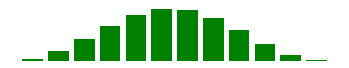

In [529]:
draw_cosine_bump(pref_dir_in, ori_input)
plt.savefig("paper_figures/changetuning_explanation_figure/straight.pdf", bbox_inches='tight')

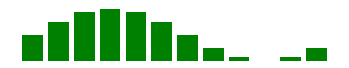

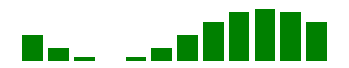

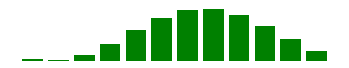

In [540]:
for _ori_input in [90, 270, 200]:
    draw_cosine_bump(pref_dir_in, _ori_input)
    plt.savefig(f"paper_figures/changetuning_explanation_figure/straight_{_ori_input}.pdf", bbox_inches='tight')

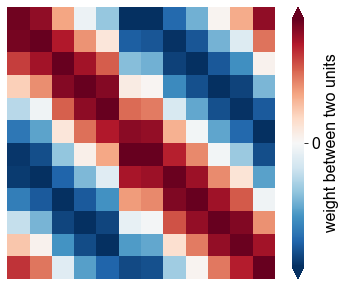

In [541]:
draw_heatmap(pref_dir_rec, pref_dir_in)
plt.savefig("paper_figures/changetuning_explanation_figure/heatmap.pdf", bbox_inches='tight')

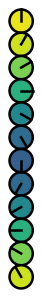

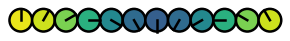

In [511]:
draw_circles(pref_dir_in, horizontal=False)
plt.savefig("paper_figures/changetuning_explanation_figure/circles_in_straight.pdf", bbox_inches='tight')
draw_circles(pref_dir_in, horizontal=True)
plt.savefig("paper_figures/changetuning_explanation_figure/circles_in_straight_h.pdf", bbox_inches='tight')

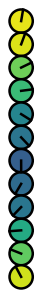

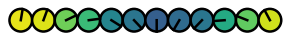

In [512]:
draw_circles(pref_dir_rec, horizontal=False)
plt.savefig("paper_figures/changetuning_explanation_figure/circles_rec_straight.pdf", bbox_inches='tight')
draw_circles(pref_dir_rec, horizontal=True)
plt.savefig("paper_figures/changetuning_explanation_figure/circles_rec_straight_h.pdf", bbox_inches='tight')

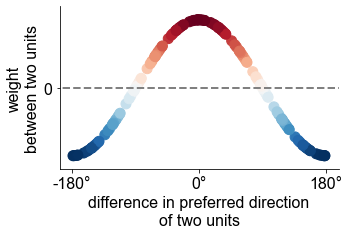

In [534]:
draw_funcplot(pref_dir_in, pref_dir_rec, reordering=None)
plt.savefig("paper_figures/changetuning_explanation_figure/funcplot_straight.pdf", bbox_inches='tight')

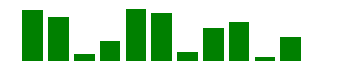

In [514]:
draw_cosine_bump(pref_dir_rec[reordering], ori_input)
plt.savefig("paper_figures/changetuning_explanation_figure/reshuffled.pdf", bbox_inches='tight')

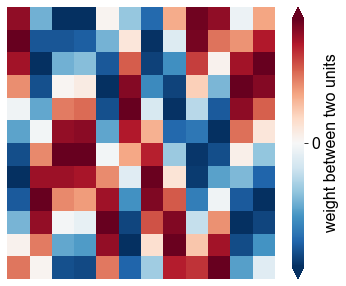

In [536]:
draw_heatmap(pref_dir_rec[reordering], pref_dir_in)
plt.savefig("paper_figures/changetuning_explanation_figure/heatmap_reshuffled.pdf", bbox_inches='tight')

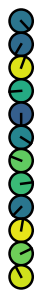

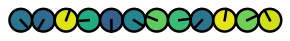

In [516]:
draw_circles(pref_dir_rec[reordering], horizontal=False)
plt.savefig("paper_figures/changetuning_explanation_figure/circles_rec_reshuffled.pdf", bbox_inches='tight')
draw_circles(pref_dir_rec[reordering], horizontal=True)
plt.savefig("paper_figures/changetuning_explanation_figure/circles_rec_reshuffled_h.pdf", bbox_inches='tight')

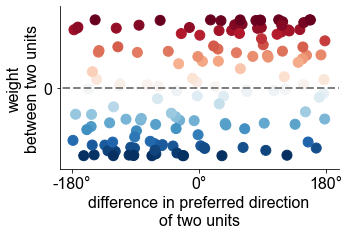

In [535]:
draw_funcplot(pref_dir_in, pref_dir_rec, reordering=reordering)
plt.savefig("paper_figures/changetuning_explanation_figure/funcplot_reshuffled.pdf", bbox_inches='tight')

# random stuff

Text(0.5, 1.0, 'Connections vs. Difference in Orientations')

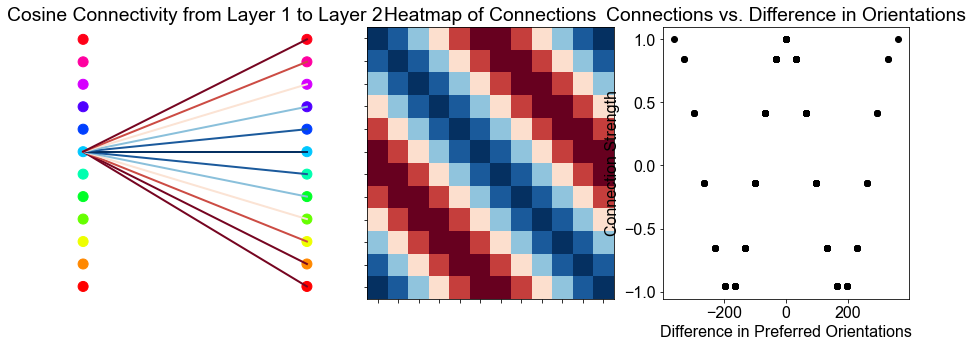

In [219]:
# Parameters
n_units = 12  # number of units in each layer
orientations = np.linspace(0, 360, n_units)
colormap = plt.cm.hsv(orientations / 360)
connection_values = np.cos(np.radians(np.subtract.outer(orientations, orientations)))

# Figure 1
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Panel 1 - Cosine Connectivity
i = n_units//2
orientation = pref_dir[i]
for j, target_orientation in enumerate(orientations):
    color = plt.cm.RdBu((connection_values[i, j] + 1) / 2)
    axs[0].plot([0, 1], [i, j], color=color, lw=2)
axs[0].scatter([0] * n_units, np.arange(n_units), c=colormap, s=100)
axs[0].scatter([1] * n_units, np.arange(n_units), c=colormap, s=100)
axs[0].set_title("Cosine Connectivity from Layer 1 to Layer 2")
axs[0].axis('off')

# Panel 2 - Heatmap
axs[1].imshow(connection_values, cmap='RdBu', aspect='auto')
axs[1].set_title("Heatmap of Connections")
axs[1].set_xticks(np.arange(n_units))
axs[1].set_yticks(np.arange(n_units))
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

# Panel 3 - Connections vs Difference in Orientations
diff_orientations = np.subtract.outer(orientations, orientations)
axs[2].scatter(diff_orientations, connection_values, c='k')
axs[2].set_xlabel("Difference in Preferred Orientations")
axs[2].set_ylabel("Connection Strength")
axs[2].set_title("Connections vs. Difference in Orientations")


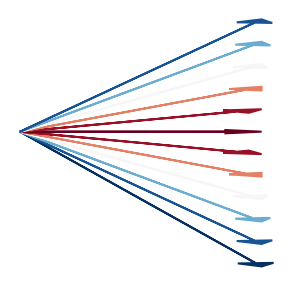

In [285]:
# Parameters
n_units = N_units
orientations = pref_dir
colormap = plt.cm.hsv(orientations / 360)
connection_values = np.cos(np.radians(np.subtract.outer(orientations, orientations)))

# Figure 1
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Panel 1 - Cosine Connectivity
i = n_units//2
orientation = pref_dir[i]
for j, target_orientation in enumerate(orientations):
    color = plt.cm.RdBu_r((connection_values[i, j] + 1) / 2)
    #axs.plot([0, 1], [i, j], color=color, lw=2)
    # Adding arrowheads to the lines
    axs.arrow(0, i, 1, j - i, color=color, lw=2, head_width=0.15, head_length=0.15, length_includes_head=True, linewidth=16)
axs.axis('off')
plt.savefig("paper_figures/changetuning_explanation_figure/arrows.pdf", bbox_inches='tight')